In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import numpy as np
import sklearn

In [62]:
gauth = GoogleAuth()           
drive = GoogleDrive(gauth)  
# read false samples
false_dict = {'name':[], 'id':[]}
file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format('13yBGR5nWOgp_U-cbYSi5XZZ0Sr1JxQlj')}).GetList()
for file in file_list:

    false_dict['name'].append(file['title'])
    false_dict['id'].append(file['id'])
    
# read true samples
true_dict = {'name':[], 'id':[]}
file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format('1mUhbkiEhDEAZgfpoO85k9yNwnGDdmLR4')}).GetList()
for file in file_list:

    true_dict['name'].append(file['title'])
    true_dict['id'].append(file['id'])

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=720490533888-nr5f4brm1bg2n064me0vba96d921uqnt.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [73]:
df1 = pd.DataFrame(false_dict)
df1['label'] = 0

df2 = pd.DataFrame(true_dict)
df2['label'] = 1

# combine both dataframes
df = pd.concat([df1,df2])
df = df.sample(frac=1).reset_index(drop=True)
print(df.head(5))

               name                                 id  label
0   Mani_false0.wav  1OgR6OorDfJaPnNSImn_3qPlFWUqFTjuq      0
1   Maninoise28.wav  1lR4Q5Kdet19eh2tE9uJETEC8Mkc8K233      1
2    Maninoise7.wav  1Nhe0ANAuFhszNOFS1Fd9w1maRmOxs2oX      1
3  Mani_false46.wav  12Ju-QYMclGx0OGMaxMrZDr661uBLY83_      0
4   Mani_false8.wav  1li77r3koxerFBLKj8ey6Y3hnnp8kCzfH      0


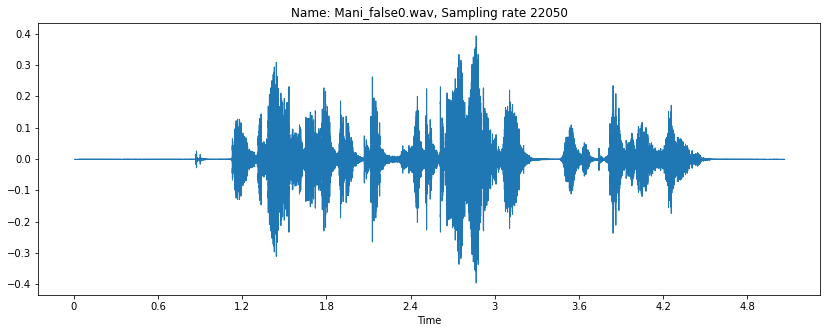

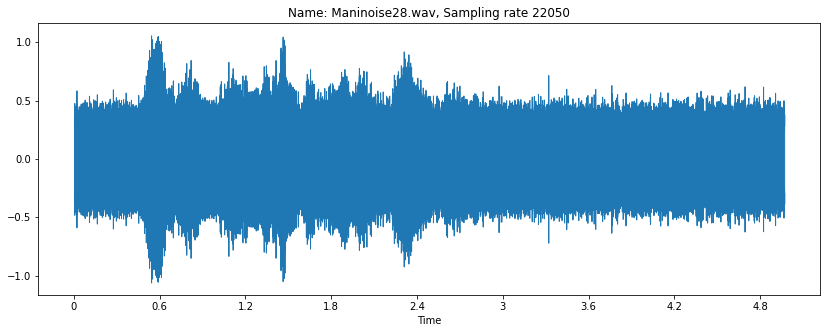

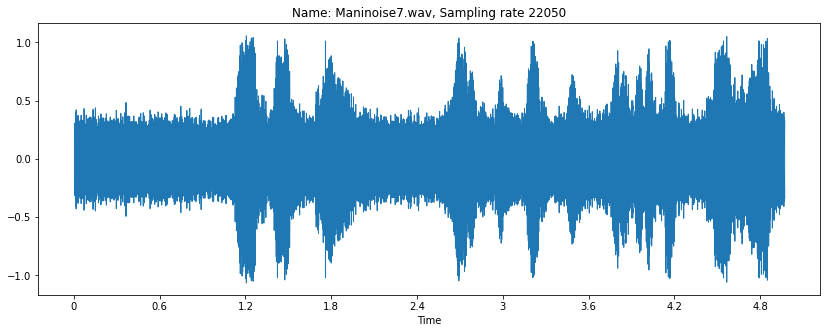

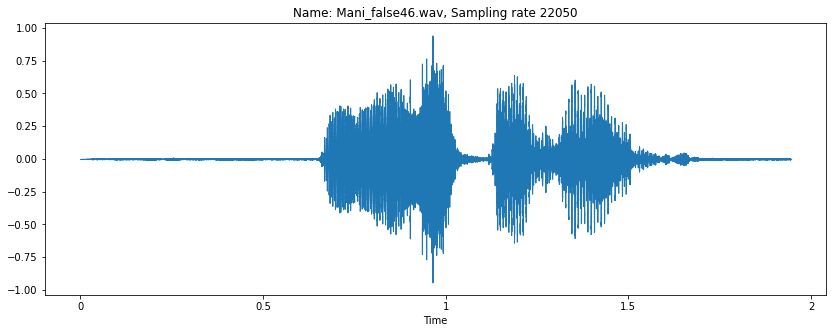

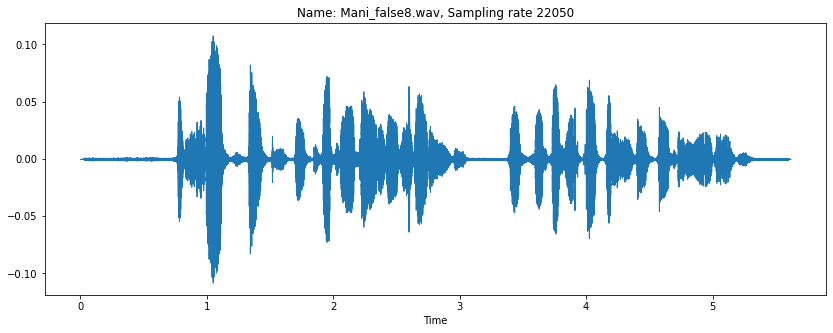

In [111]:
n = 5
for i in range(n):
    read_file = drive.CreateFile({'id': df.iloc[i][1]})
    read_file.GetContentFile(df.iloc[i][0])
 
    x , sr = librosa.load(df.iloc[i][0])
 
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(x, sr=sr)
    plt.title('Name: '+str(df.iloc[i][0]) + ', Sampling rate ' + str(sr))
   

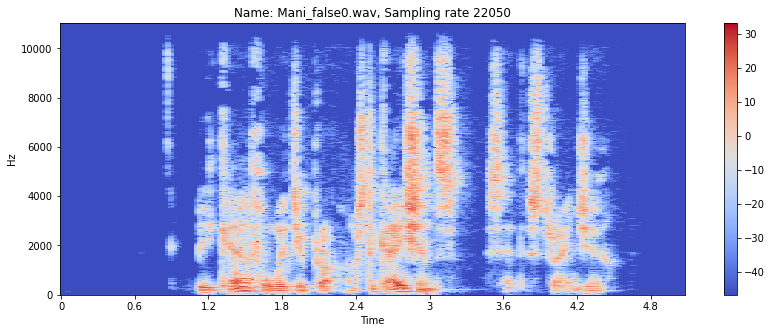

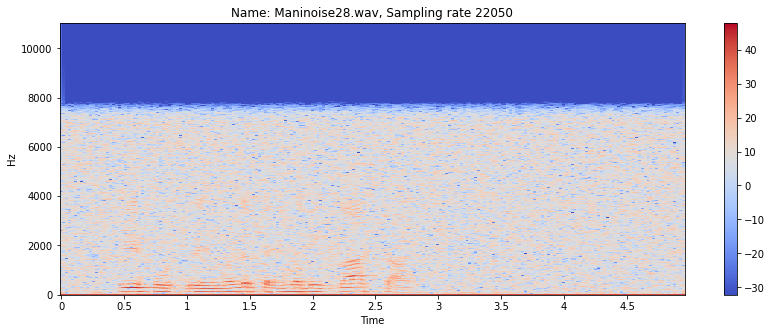

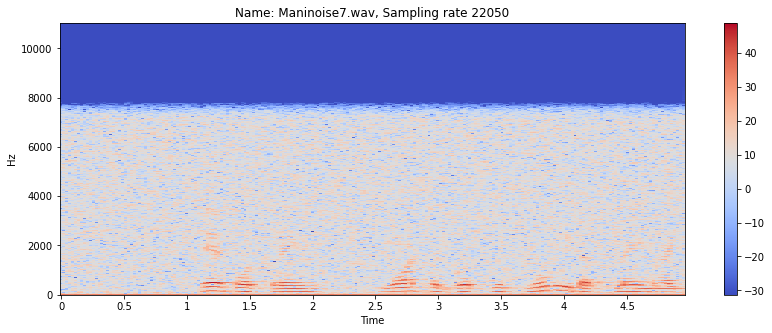

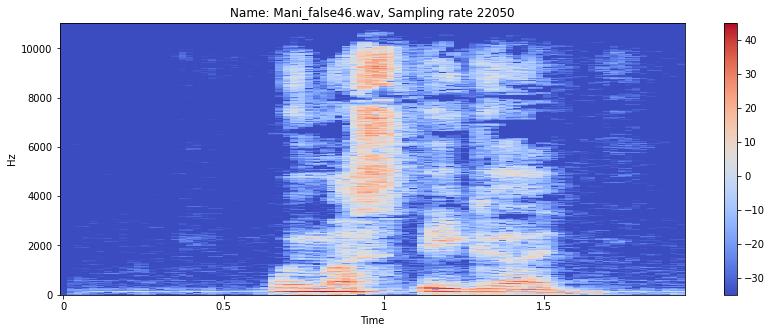

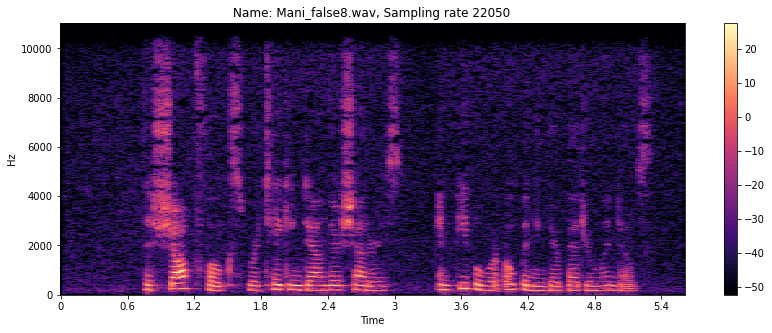

In [110]:
#Spectogram
n = 5
for i in range(n):
    read_file = drive.CreateFile({'id': df.iloc[i][1]})
    read_file.GetContentFile(df.iloc[i][0])
    
    x , sr = librosa.load(df.iloc[i][0])
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
    plt.title('Name: '+str(df.iloc[i][0]) + ', Sampling rate ' + str(sr))
    plt.colorbar()

/var/folders/xh/5cg8lrrd71530j0krmqch2l80000gn/T/ipykernel_1480/3956574219.py:12: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
/var/folders/xh/5cg8lrrd71530j0krmqch2l80000gn/T/ipykernel_1480/3956574219.py:12: FutureWarning: Pass y=[-0.05572664 -0.03684929 -0.20790261 ... -0.38153705 -0.25386176
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
/var/folders/xh/5cg8lrrd71530j0krmqch2l80000gn/T/ipykernel_1480/3956574219.py:12: FutureWarning: Pass y=[ 0.0404218  -0.02424873 -0.14567642 ... -0.05463896 -0.12626812
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
/var/

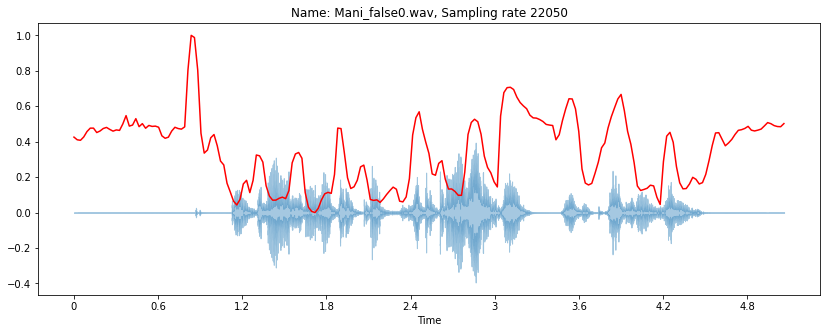

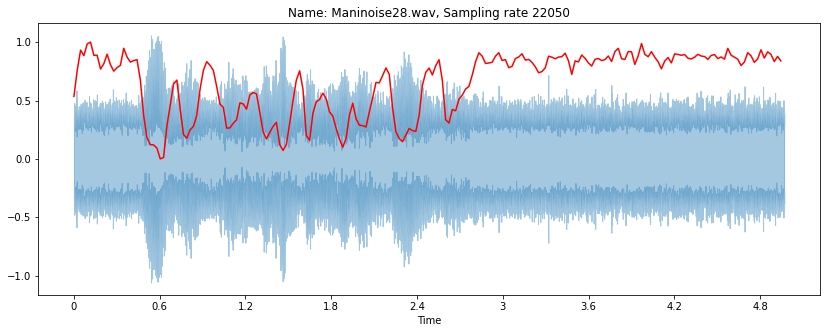

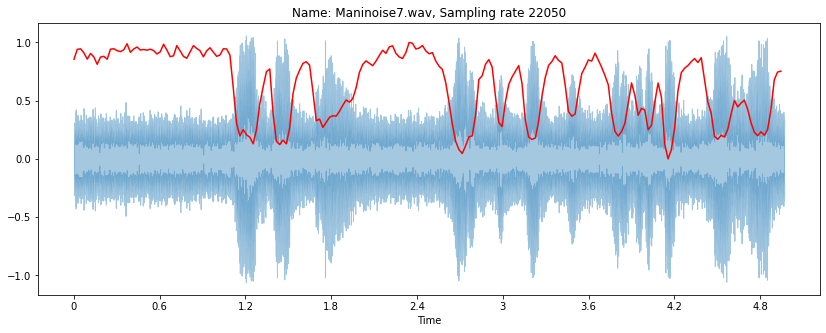

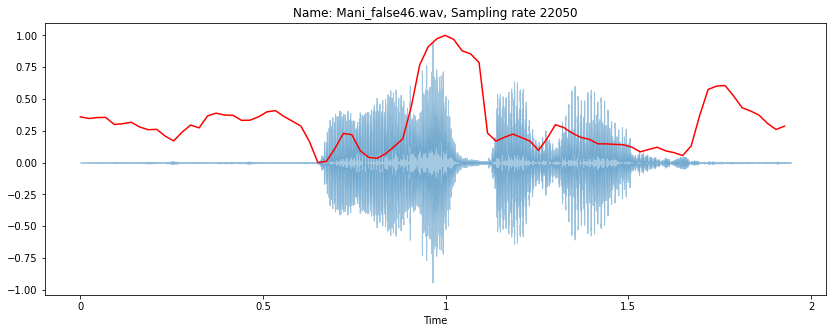

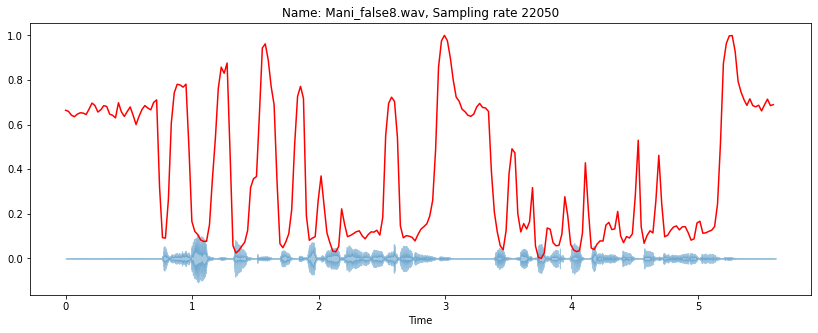

In [121]:
#spectral centroid

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

n = 5
for i in range(n):
    read_file = drive.CreateFile({'id': df.iloc[i][1]})
    read_file.GetContentFile(df.iloc[i][0])
    
    x , sr = librosa.load(df.iloc[i][0])
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    spectral_centroids.shape
    # Computing the time variable for visualization
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    # Normalising the spectral centroid for visualisation
    plt.figure(figsize=(14, 5))
    #Plotting the Spectral Centroid along the waveform
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.title('Name: '+str(df.iloc[i][0]) + ', Sampling rate ' + str(sr))

In [162]:
feature_dict = {'rmse':[],'chroma_stft':[], 'spec_cent':[],'spec_bw':[],'rolloff':[],'zcr':[],'mfcc':[], 'label':[]}
for i in range(df.shape[0]):
    read_file = drive.CreateFile({'id': df.iloc[i][1]})
    read_file.GetContentFile(df.iloc[i][0])
 
    x , sr = librosa.load(df.iloc[i][0])
    rmse = librosa.feature.rms(y=x)
    chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(x)
    mfcc = librosa.feature.mfcc(y=x, sr=sr)
    label = df.loc[i]['label']
  
    
    feature_dict['rmse'].append(rmse)
    feature_dict['chroma_stft'].append(chroma_stft)
    feature_dict['spec_cent'].append(spec_cent)
    feature_dict['spec_bw'].append( spec_bw)
    feature_dict['rolloff'].append(rolloff)
    feature_dict['zcr'].append(zcr)
    feature_dict['mfcc'].append(mfcc)
    feature_dict['label'].append(label)
 

print(feature_dict)

{'rmse': [array([[1.20377572e-05, 2.16155167e-05, 2.68968997e-05, 2.93111552e-05,
        2.99136900e-05, 2.65226136e-05, 2.43918530e-05, 2.34828349e-05,
        2.13678632e-05, 1.98118105e-05, 1.63425666e-05, 1.48773570e-05,
        1.30929975e-05, 1.19048245e-05, 1.29928640e-05, 1.31735005e-05,
        1.28383235e-05, 1.25160304e-05, 1.23755526e-05, 1.15254943e-05,
        1.34545162e-05, 1.35552200e-05, 1.47228848e-05, 1.64475714e-05,
        1.57202066e-05, 1.84177188e-05, 2.48111155e-05, 3.08154486e-05,
        3.47749010e-05, 3.61787097e-05, 3.27712987e-05, 2.65859289e-05,
        2.04606022e-05, 1.52669109e-05, 3.74686242e-05, 4.72274187e-05,
        2.31997366e-03, 2.93999305e-03, 2.96208146e-03, 2.96572805e-03,
        1.84867415e-03, 3.97089520e-04, 1.63555465e-04, 8.63471869e-05,
        1.01632359e-04, 1.19714248e-04, 1.79463823e-04, 7.61774415e-03,
        2.98348833e-02, 4.40417230e-02, 5.07151708e-02, 5.21537699e-02,
        4.47210819e-02, 3.14827450e-02, 1.94836557e-02

In [157]:
df_model = pd.DataFrame(feature_dict)
print(df_model.head)

                                                rmse  \
0  [[1.2037757e-05, 2.1615517e-05, 2.68969e-05, 2...   
1  [[0.17685384, 0.21684624, 0.25046253, 0.249941...   

                                         chroma_stft  \
0  [[0.49116787, 0.7692773, 1.0, 0.97284687, 0.61...   
1  [[0.8268118, 0.74510986, 0.4696388, 0.45677122...   

                                           spec_cent  \
0  [[3767.3374056709927, 3653.53502869606, 3631.7...   
1  [[2788.094920797701, 3024.770971351655, 3201.0...   

                                             spec_bw  \
0  [[2415.544403944122, 2514.589435151383, 2668.0...   
1  [[2440.069969306105, 2412.3052832423577, 2402....   

                                             rolloff  \
0  [[6180.029296875, 6384.5947265625, 6815.258789...   
1  [[5878.564453125, 6061.5966796875, 6212.329101...   

                                                 zcr  \
0  [[0.115234375, 0.23828125, 0.36962890625, 0.51...   
1  [[0.0048828125, 0.009765625, 0.015625, 0